# Rac interactors during encystation of Giardia lamblia 

In [ ]:
# preliminaries 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn
import pylab
%matplotlib inline

In [ ]:
# pull in data 
data = pd.read_csv('Sim_troph_3rd_8h_1st.csv')

In [ ]:
data.shape
#data


In [ ]:
#pulls data for which Num.Seq column value is greater than 2 
sig_data = data.loc[data.NumSeq > 2]
#sig_data['rac_troph']
#sig_data

In [ ]:
#graph of proteins that have NumSeq >2
fig = plt.figure()


ax1 = fig.add_subplot(221)
ax1.set_title('rac troph')
ax1.axes.get_xaxis().set_visible(False)
sig_data['rac_troph'].plot(kind = 'bar')

ax2 = fig.add_subplot(222)
ax2.set_title('rac encyst')
ax2.axes.get_xaxis().set_visible(False)
sig_data['rac_encyst'].plot(kind = 'bar')

ax3 = fig.add_subplot(223)
ax3.set_title('wt troph')
ax3.axes.get_xaxis().set_visible(False)
sig_data['wt_troph'].plot(kind = 'bar')

ax4 = fig.add_subplot(224)
ax4.set_title('wt encyst')
ax4.axes.get_xaxis().set_visible(False)
sig_data['wt_encyst'].plot(kind = 'bar')

from pylab import *
fig = gcf()
fig.suptitle('Overall expression level where NumSeq > 2')



#fig.subplots_adjust(left=None, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)

pylab.savefig('overall_expression_bar.png', bbox_inches='tight')

In [6]:
# Categorize the proteins into 2 ranges, <11 or >40.
# Higher NumSeq scores = more important protein or abundance? 
high_prot = sig_data.loc[sig_data['NumSeq'] > 40]
low_prot = sig_data.loc[sig_data['NumSeq'] < 11]

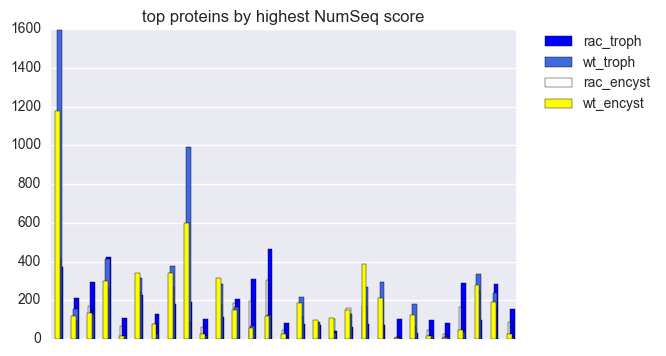

In [7]:
#graph of abundance of top proteins in each category 
b1 = high_prot.rac_troph.plot(kind = 'bar', color = 'blue', position = 0.2, width = 0.3)
b2 = high_prot.wt_troph.plot(kind = 'bar', color = 'royalblue', position = .4 , width = 0.3)
b3 = high_prot.rac_encyst.plot(kind = 'bar', color = '', position = 0.6, width = 0.3)
b4 = high_prot.wt_encyst.plot(kind = 'bar', color = 'yellow', position = 0.8, width = 0.3)

ax1 = plt.axes()

ax1.set_title('top proteins by highest NumSeq score')
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

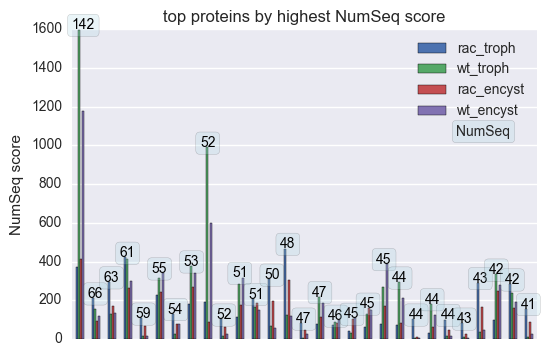

In [8]:
#numSeqScores = high_prot_test.loc[:,'NumSeq']
high_prot_test = high_prot.loc[:,'rac_troph':'wt_encyst']
high_prot_numSeq = np.array(high_prot.loc[:,'NumSeq'])
high_prot_test.plot(kind = 'bar')
ax = plt.axes()
ax.set_title('top proteins by highest NumSeq score')
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel('NumSeq score')
#ax.set_xlabel()

y = np.array(high_prot_test.max(axis = 1))
x = np.arange(len(high_prot_test))
for i, j in zip(x, y):
    ax.annotate(str(high_prot_numSeq[i]), xy = (i - 0.5,j + 1), color = 'black', bbox = dict(facecolor = 'lightblue', edgecolor = 'black', alpha = 0.25, boxstyle = 'round'))
ax.text(23.5, 1050, "NumSeq", bbox = dict(facecolor = 'lightblue', edgecolor = 'black', alpha = 0.25, boxstyle = 'round'))

pylab.savefig('numseq_bar.png', bbox_inches='tight')

In [9]:
#writes Fasta ID column to csv file for upload at Giardiadb.org
sig_data['Fasta ID'].to_csv('Rac_Interactors_by_NumSeq.fasta')
sig_data = sig_data.copy()
sig_data.loc[:,'rac_wt_troph'] = sig_data['rac_troph'] - sig_data['wt_troph']
sig_data.loc[:,'rac_wt_encyst'] = sig_data['rac_encyst'] - sig_data['wt_encyst']
sig_data.loc[:,'rac_div_wt_troph'] = sig_data['rac_troph'] / sig_data['wt_troph']
sig_data.loc[:,'rac_div_wt_encyst'] = sig_data['rac_encyst'] / sig_data['wt_encyst']

troph_prot_by_dif = sig_data.sort_values(by = 'rac_wt_troph', ascending = False)
encyst_prot_by_dif = sig_data.sort_values(by = 'rac_wt_encyst', ascending = False)

troph_prot_div = sig_data.sort_values(by = 'rac_div_wt_troph', ascending = False)
encyst_prot_div = sig_data.sort_values(by = 'rac_div_wt_encyst', ascending = False)

troph_prot_by_dif['Fasta ID'].to_csv('Rac_Interactors_troph_dif.fasta', index = False)
encyst_prot_by_dif['Fasta ID'].to_csv('Rac_Interactors_encyst_dif.fasta')




In [10]:
troph_prot_by_dif[troph_prot_by_dif.rac_wt_troph > 0]

,ProteinGroupID,Fasta ID,NumSeq,rac_troph,wt_troph,rac_encyst,wt_encyst,rac_wt_troph,rac_wt_encyst,rac_div_wt_troph,rac_div_wt_encyst
13,1202,GL50803_9413,48,467,125,307,118,342,189,3.736000,2.601695
63,1214,GL50803_8496,30,309,42,189,55,267,134,7.357143,3.436364
25,1290,GL50803_21118,43,290,37,165,45,253,120,7.837838,3.666667
12,1498,GL50803_113892,50,308,65,195,55,243,140,4.738462,3.545455
215,813,GL50803_9558,14,229,28,121,40,201,81,8.178571,3.025000
39,781,GL50803_9062,35,230,46,174,23,184,151,5.000000,7.565217
84,394,GL50803_15567,25,198,23,136,23,175,113,8.608696,5.913043
76,1630,GL50803_16353,27,196,28,81,28,168,53,7.000000,2.892857
2,1700,GL50803_102108,63,294,130,171,136,164,35,2.261538,1.257353
56,894,GL50803_9719,32,212,56,146,76,156,70,3.785714,1.921053


In [11]:
# Attempt to filter the proteins found by protein's functions.
# Goal: To create a pie chart counting the frequency of each function.

protein_data = pd.read_csv('GeneByLocusTag_Summary.txt', sep = '\t')
product = protein_data.iloc[:, [4]]
product


,[Product Description]
0,hypothetical protein
1,hypothetical protein
2,"Phospholipid-transporting ATPase IA, putative"
3,Alpha-12 giardin
4,"Vacuolar protein sorting 26, putative"
5,"Dynein heavy chain, putative"
6,Ribosomal protein L23
7,VSP with INR
8,Dynein heavy chain
9,Protein 21.1


In [ ]:
troph_no_wt_full = troph_prot_by_dif[(troph_prot_by_dif.rac_troph > 0) & (troph_prot_by_dif.wt_troph == 0)] 
encyst_no_wt_full = encyst_prot_by_dif[(encyst_prot_by_dif.rac_encyst > 0) & (encyst_prot_by_dif.wt_encyst == 0)]
both_no_wt_full = encyst_prot_by_dif[(encyst_prot_by_dif.rac_encyst > 0) & (encyst_prot_by_dif.wt_encyst == 0) & (encyst_prot_by_dif.rac_troph > 0) & (encyst_prot_by_dif.wt_troph == 0)]
both_no_wt_ns10 = both_no_wt_full[both_no_wt_full.NumSeq > 10]
troph_no_wt_ns10 = troph_no_wt_full[troph_no_wt_full.NumSeq > 10]
encyst_no_wt_ns10 = encyst_no_wt_full[encyst_no_wt_full.NumSeq > 10]

both_no_wt_ns10.loc[:,['Fasta ID','rac_troph','rac_encyst']]
#This is a table of the proteins of the highest coverage in both troph and encyst stages 
#that also have no representation in the wild-type samples 

In [ ]:
both_no_wt = len(both_no_wt_full)
just_rac_troph = len(troph_no_wt_full)
just_rac_encyst = len(encyst_no_wt_full)

print('Proteins found in rac trophs and not in wt trophs:', just_rac_troph)
print('Proteins found in rac encysts and not wt encysts:', just_rac_encyst)
print('Proteins found in both rac trophs and encysts and not in wt trophs nor encysts:', both_no_wt)

In [ ]:
both_no_wt_ns10 = len(both_no_wt_ns10)
just_rac_troph_ns10 = len(troph_no_wt_ns10)
just_rac_encyst_ns10 = len(encyst_no_wt_ns10)


In [ ]:
#Proteins found bar chart
stats = np.array([both_no_wt,just_rac_troph,just_rac_encyst])

fig = plt.figure()

ax3 = fig.add_subplot(121)
ttl = ax3.set_title('Stage-dependent Rac-associated protein abundance')
ttl.set_position([.5, 1.05])
x_axis = ax3.axes.get_xaxis()
x_axis.set_visible(False)
ax3.set_ylabel('protein abundance')
plt.bar([1,2,3],stats)
#plt.bar([1,2,3],[both_no_wt_ns10, just_rac_troph_ns10, just_rac_encyst_ns10], color = 'green')

for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

pylab.savefig('Stage-dependent Rac-associated protein abundance', bbox_inches = 'tight')